In [1]:
import pandas as pd 
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import warnings

warnings.filterwarnings("ignore",message= "use_inf_as_na option is deprecated")

In [2]:
df = pd.read_csv("Training Data.csv")

In [3]:
len(df)

252000

In [4]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

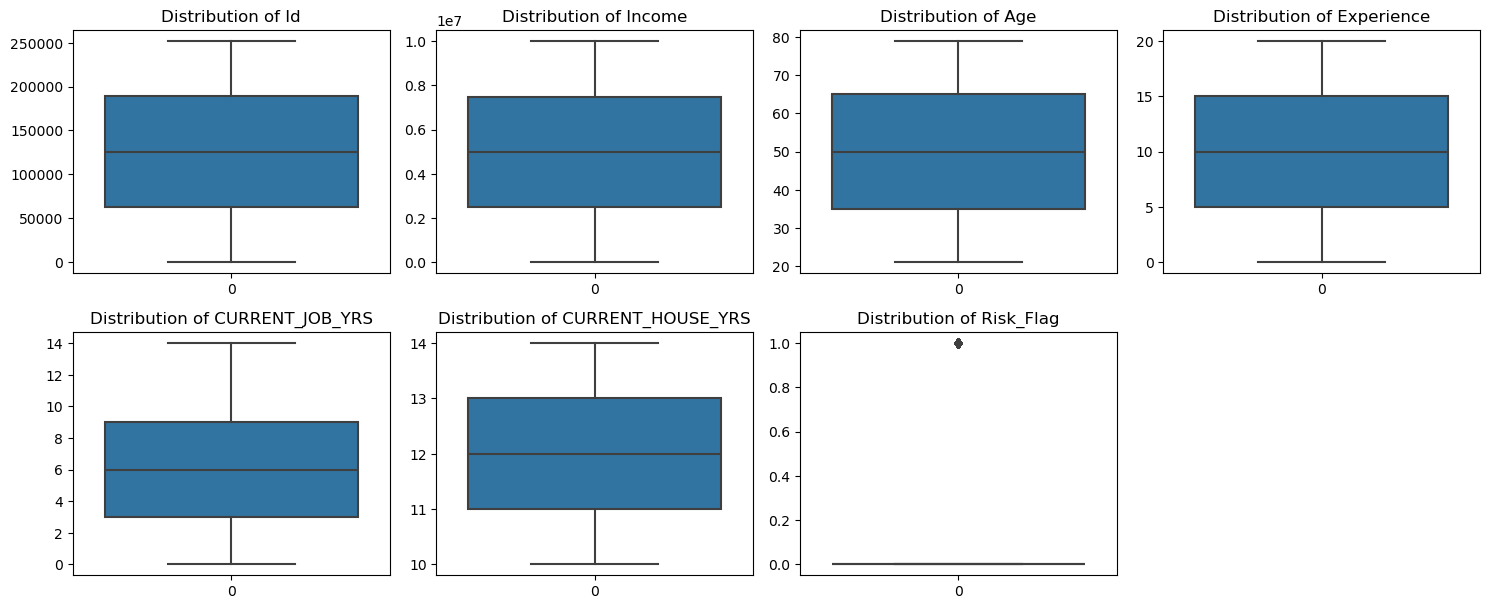

In [7]:
rows = 4
cols = 4
fig, axes = plt.subplots(rows, cols , figsize=(15,12))
axes = axes.flatten()
num_cols = df.select_dtypes(exclude= 'object')
for i, col in enumerate(num_cols.columns):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

for j in range (i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

In [8]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Risk_Flag == 0]
df_minority = df[df.Risk_Flag == 1]

# Downsample majority class
df = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=42)

# Combine minority class with downsampled majority
df = pd.concat([df, df_minority])

# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


In [9]:
#Split Data

X = df.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

X.to_csv("Train.csv")
y.to_csv("Target.csv")

In [10]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

def scale_encode(df):
    encoder = OrdinalEncoder()
    X_encoded = pd.DataFrame(encoder.fit_transform(X), columns=X.columns)
    
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_encoded), columns=X.columns)
    
    return X_scaled

X = scale_encode(X)

In [11]:
X

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-0.489423,1.019361,-1.544432,-1.302125,0.323257,0.260906,-0.633655,-1.157139,-0.571624,-0.296515,-1.157726,-1.421622
1,1.472461,-1.082619,-0.440167,-0.804817,0.323257,0.260906,-0.633655,1.410322,-1.313031,-0.296515,-0.342605,-0.708274
2,-1.541864,-1.648290,-1.137598,-0.804817,0.323257,0.260906,-0.633655,1.545451,-0.168211,-1.474362,-0.342605,0.005075
3,-1.669773,0.162539,0.838457,-1.467894,0.323257,0.260906,-0.633655,0.869804,0.747645,0.024716,-1.429433,1.431771
4,0.701208,-1.504017,1.710245,-0.804817,0.323257,0.260906,-0.633655,0.937368,-1.422062,1.202562,-0.614312,0.005075
...,...,...,...,...,...,...,...,...,...,...,...,...
61987,1.065488,-1.701992,0.547860,0.687106,0.323257,0.260906,1.578145,0.126591,1.663501,0.881331,-0.070898,-0.708274
61988,-0.979601,0.333262,1.012814,1.018644,0.323257,0.260906,1.578145,1.545451,-0.200920,-1.367285,-0.886019,1.431771
61989,-0.328434,-1.384190,0.896576,0.687106,0.323257,0.260906,-0.633655,-1.562527,-1.640123,-0.189438,1.831051,-0.708274
61990,-0.100276,-0.900675,-1.486313,0.024029,-3.093513,0.260906,1.578145,0.734674,1.499955,0.881331,-0.070898,0.005075


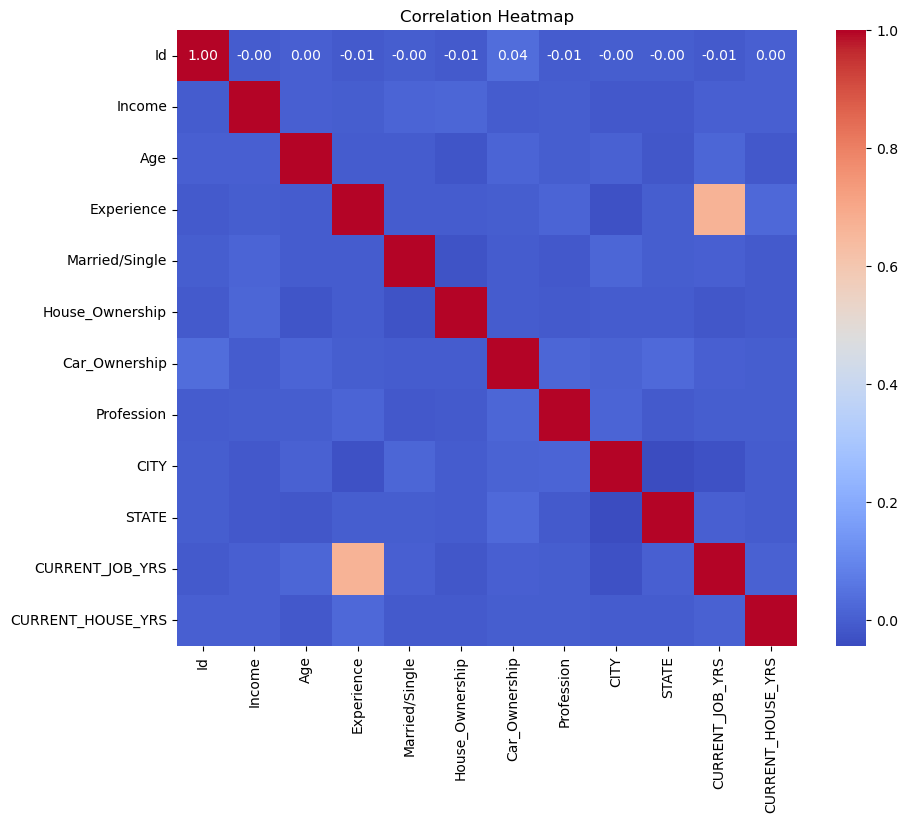

In [12]:
df_corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_corr, annot=True, cmap = 'coolwarm', fmt= '.2f')
plt.title("Correlation Heatmap")
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


model = RandomForestClassifier(class_weight='balanced', 
                               n_estimators=200,
                                random_state=42)


model.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [15]:
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      6200
           1       0.81      0.92      0.86      6199

    accuracy                           0.85     12399
   macro avg       0.86      0.85      0.85     12399
weighted avg       0.86      0.85      0.85     12399



In [16]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np

# --- Identify column types properly
# You need to separate categorical and numerical columns
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
numerical_cols = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']

# Make sure columns exist in your dataset
available_categorical = [col for col in categorical_cols if col in X.columns]
available_numerical = [col for col in numerical_cols if col in X.columns]

print(f"Categorical columns: {available_categorical}")
print(f"Numerical columns: {available_numerical}")

# --- Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), available_categorical),
        ('num', StandardScaler(), available_numerical)
    ],
    remainder='passthrough'  # Keep any other columns as-is
)

# --- Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, 
                                                    random_state=42)

# --- Complete pipeline with preprocessing and model
complete_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced',
                                          n_estimators=200,
                                          random_state=42))
])

# --- Fit the complete pipeline
complete_pipeline.fit(X_train, y_train)

# --- Evaluate
y_pred = complete_pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- Save the complete pipeline and feature list
joblib.dump(complete_pipeline, 'complete_pipeline.joblib')
joblib.dump(X.columns.tolist(), 'features.joblib')  # Save the feature list

print("Model and features saved successfully!")
print(f"Expected features: {X.columns.tolist()}")

Categorical columns: ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
Numerical columns: ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
[[4868 1332]
 [ 446 5753]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      6200
           1       0.81      0.93      0.87      6199

    accuracy                           0.86     12399
   macro avg       0.86      0.86      0.86     12399
weighted avg       0.86      0.86      0.86     12399

Model and features saved successfully!
Expected features: ['Id', 'Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']


In [17]:
import joblib
import pandas as pd

# Load the saved components
complete_pipeline = joblib.load("complete_pipeline.joblib")
expected_features = joblib.load("features.joblib")

print(f"Expected features: {expected_features}")

# Raw client data
new_client = {
    'Income': 300000,
    'Age': 20,
    'Experience': 10,
    'Married/Single': 'Married',
    'House_Ownership': 'Rent',
    'Car_Ownership': 'Yes',
    'Profession': 'Artist',
    'CITY': 'Bahraich',
    'STATE': 'Uttar',
    'CURRENT_JOB_YRS': 10,
    'CURRENT_HOUSE_YRS': 2
}

# Create DataFrame
client_df = pd.DataFrame([new_client])

print(f"Client data columns: {client_df.columns.tolist()}")

# Add missing columns with appropriate default values
for col in expected_features:
    if col not in client_df.columns:
        # Add missing columns with default values based on column type
        if col in ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']:
            client_df[col] = 'Unknown'  # Default for categorical
        else:
            client_df[col] = 0  # Default for numerical

# Reorder columns to match training features
client_df = client_df[expected_features]

print(f"Final client data shape: {client_df.shape}")
print(f"Client data:\n{client_df}")

try:
    # Use the complete pipeline (includes preprocessing)
    risk_pred = complete_pipeline.predict(client_df)
    risk_prob = complete_pipeline.predict_proba(client_df)[:, 1]
    
    print(f"\nRisk prediction (default=1, no default=0): {risk_pred[0]}")
    print(f"Probability of default: {risk_prob[0]:.2f}")
    
    # Interpretation
    if risk_pred[0] == 1:
        print("⚠️  HIGH RISK: Client is likely to default")
    else:
        print("✅ LOW RISK: Client is unlikely to default")
    
    print(f"Confidence: {max(risk_prob[0], 1-risk_prob[0]):.2f}")
    
except Exception as e:
    print(f"Prediction failed: {e}")
    print("Please check your model and data alignment.")

Expected features: ['Id', 'Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
Client data columns: ['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
Final client data shape: (1, 12)
Client data:
   Id  Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   0  300000   20          10        Married            Rent           Yes   

  Profession      CITY  STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  
0     Artist  Bahraich  Uttar               10                  2  

Risk prediction (default=1, no default=0): 0
Probability of default: 0.25
✅ LOW RISK: Client is unlikely to default
Confidence: 0.75
